In [50]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## MVP - Spotify song popularity predictor
### Cleaning data

For this project I am training a model using Spotify track metadata to predict a song's popularity. I have a dataset of 1277 rows and 13 features. 

In [42]:
# import data

spotify_df = pd.read_csv('/Users/joycetagal/Github/metis/reg/spotify_full_data.csv')

In [43]:
spotify_df.shape

(1277, 23)

In [44]:
spotify_df.head()

id  popularity   duration  loudness    tempo  \
0  67BtfxlNbhBmCDR2L2l8qd          93  137.87573    -6.682  178.818   
1  1lNEXDlxVhsWaq2DLBUDgC          73  167.12000    -6.484   80.043   
2  5ScbulRnixQ2XAdvrPMFjz          81  229.30354    -6.770  177.693   
3  15hJmqqEtASVXl6sM7i4UF          75  270.67078    -5.620  130.027   
4  3RkNXZvOSMMElmmXztDc94          80  245.13103    -9.840   87.073   

   tempo_confidence  time_signature  time_signature_confidence   key  \
0             0.113             4.0                      1.000   8.0   
1             0.455             4.0                      1.000   1.0   
2             0.119             3.0                      1.000   8.0   
3             0.225             4.0                      0.896  10.0   
4             0.262             4.0                      0.979   4.0   

   key_confidence  ...  danceability  energy  instrumentalness  liveness  \
0           0.586  ...         0.610   0.508          0.000000    0.3840   
1           0.335  ...         0.654   0.713          0.000000    0.0837   
2           0.505  ...         0.320   0.466          0.000000    0.1330   
3           0.435  ...         0.615   0.600          0.000002    0.2830   
4           0.742  ...         0.783   0.416          0.000000    0.1030   

   speechiness  valence                           title                artist  \
0       0.1520   0.7580  MONTERO (Call Me By Your Name)             Lil Nas X   
1       0.0846   0.6940                    simple times       Kacey Musgraves   
2       0.0374   0.3380                Get Along Better  Drake, Ty Dolla $ign   
3       0.2700   0.0661                   trademark usa                BaKeem   
4       0.1350   0.1650                    F*****g Fans                 Drake   

                  song id        weekly chart date  
0  67BtfxlNbhBmCDR2L2l8qd  2021-09-10 - 2021-09-17  
1  1lNEXDlxVhsWaq2DLBUDgC  2021-09-10 - 2021-09-17  
2  5ScbulRnixQ2XAdvrPMFjz  2021-09-10 - 2021-09-17  
3  15hJmqqEtASVXl6sM7i4UF  2021-09-10 - 2021-09-17  
4  3RkNXZvOSMMElmmXztDc94  2021-09-10 - 2021-09-17  

[5 rows x 23 columns]

In [45]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1277 non-null   object 
 1   popularity                 1277 non-null   int64  
 2   duration                   1276 non-null   float64
 3   loudness                   1276 non-null   float64
 4   tempo                      1276 non-null   float64
 5   tempo_confidence           1276 non-null   float64
 6   time_signature             1276 non-null   float64
 7   time_signature_confidence  1276 non-null   float64
 8   key                        1276 non-null   float64
 9   key_confidence             1276 non-null   float64
 10  mode                       1276 non-null   float64
 11  mode_confidence            1276 non-null   float64
 12  acousticness               1277 non-null   float64
 13  danceability               1277 non-null   float

In [46]:
spotify_df = spotify_df.dropna(axis='index') # Drop NA values
spotify_df = spotify_df.select_dtypes(exclude=['object']).copy() # Drop non-numerical columns
spotify_df = spotify_df.drop(columns=['tempo_confidence', 'time_signature_confidence', 'key_confidence', 'mode_confidence'] 
)  # Drop confidence columns
spotify_df.head()

popularity   duration  loudness    tempo  time_signature   key  mode  \
0          93  137.87573    -6.682  178.818             4.0   8.0   0.0   
1          73  167.12000    -6.484   80.043             4.0   1.0   0.0   
2          81  229.30354    -6.770  177.693             3.0   8.0   1.0   
3          75  270.67078    -5.620  130.027             4.0  10.0   1.0   
4          80  245.13103    -9.840   87.073             4.0   4.0   0.0   

   acousticness  danceability  energy  instrumentalness  liveness  \
0       0.29700         0.610   0.508          0.000000    0.3840   
1       0.62800         0.654   0.713          0.000000    0.0837   
2       0.00645         0.320   0.466          0.000000    0.1330   
3       0.10700         0.615   0.600          0.000002    0.2830   
4       0.21300         0.783   0.416          0.000000    0.1030   

   speechiness  valence  
0       0.1520   0.7580  
1       0.0846   0.6940  
2       0.0374   0.3380  
3       0.2700   0.0661  
4       0.1350   0.1650

In [47]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1276
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1276 non-null   int64  
 1   duration          1276 non-null   float64
 2   loudness          1276 non-null   float64
 3   tempo             1276 non-null   float64
 4   time_signature    1276 non-null   float64
 5   key               1276 non-null   float64
 6   mode              1276 non-null   float64
 7   acousticness      1276 non-null   float64
 8   danceability      1276 non-null   float64
 9   energy            1276 non-null   float64
 10  instrumentalness  1276 non-null   float64
 11  liveness          1276 non-null   float64
 12  speechiness       1276 non-null   float64
 13  valence           1276 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 149.5 KB


## Visualizing and exploring data

In [19]:
spotify_df.corr()

popularity  duration  loudness     tempo  time_signature  \
popularity          1.000000  0.118371  0.183157 -0.014511        0.052758   
duration            0.118371  1.000000  0.044729  0.009761        0.015194   
loudness            0.183157  0.044729  1.000000  0.078766        0.112790   
tempo              -0.014511  0.009761  0.078766  1.000000        0.006962   
time_signature      0.052758  0.015194  0.112790  0.006962        1.000000   
key                 0.059334  0.012808  0.033727 -0.024737        0.078812   
mode               -0.099300  0.043011 -0.008602  0.000884       -0.051453   
acousticness       -0.115256  0.035640 -0.529416 -0.069750       -0.154090   
danceability        0.081155 -0.187415  0.224202 -0.045288        0.199745   
energy              0.085161  0.022556  0.721004  0.085971        0.177379   
instrumentalness    0.021501 -0.012959 -0.181518 -0.015068       -0.060418   
liveness           -0.078753 -0.013985  0.041598 -0.061633       -0.050545   
speechiness        -0.031458 -0.086173  0.016817  0.121714        0.061508   
valence            -0.048735 -0.170310  0.154396  0.030680        0.105198   

                       key      mode  acousticness  danceability    energy  \
popularity        0.059334 -0.099300     -0.115256      0.081155  0.085161   
duration          0.012808  0.043011      0.035640     -0.187415  0.022556   
loudness          0.033727 -0.008602     -0.529416      0.224202  0.721004   
tempo            -0.024737  0.000884     -0.069750     -0.045288  0.085971   
time_signature    0.078812 -0.051453     -0.154090      0.199745  0.177379   
key               1.000000 -0.179259     -0.019881      0.067793  0.068362   
mode             -0.179259  1.000000      0.073749     -0.142209 -0.030317   
acousticness     -0.019881  0.073749      1.000000     -0.342112 -0.563166   
danceability      0.067793 -0.142209     -0.342112      1.000000  0.128903   
energy            0.068362 -0.030317     -0.563166      0.128903  1.000000   
instrumentalness  0.062938 -0.020911      0.070905     -0.106570 -0.044784   
liveness         -0.010794  0.026627     -0.016731     -0.119982  0.123373   
speechiness       0.039918 -0.150935     -0.171802      0.297346  0.045206   
valence           0.119017  0.017034     -0.096420      0.289707  0.324390   

                  instrumentalness  liveness  speechiness   valence  
popularity                0.021501 -0.078753    -0.031458 -0.048735  
duration                 -0.012959 -0.013985    -0.086173 -0.170310  
loudness                 -0.181518  0.041598     0.016817  0.154396  
tempo                    -0.015068 -0.061633     0.121714  0.030680  
time_signature           -0.060418 -0.050545     0.061508  0.105198  
key                       0.062938 -0.010794     0.039918  0.119017  
mode                     -0.020911  0.026627    -0.150935  0.017034  
acousticness              0.070905 -0.016731    -0.171802 -0.096420  
danceability             -0.106570 -0.119982     0.297346  0.289707  
energy                   -0.044784  0.123373     0.045206  0.324390  
instrumentalness          1.000000  0.049480    -0.046770 -0.079770  
liveness                  0.049480  1.000000     0.086149  0.016250  
speechiness              -0.046770  0.086149     1.000000  0.061570  
valence                  -0.079770  0.016250     0.061570  1.000000

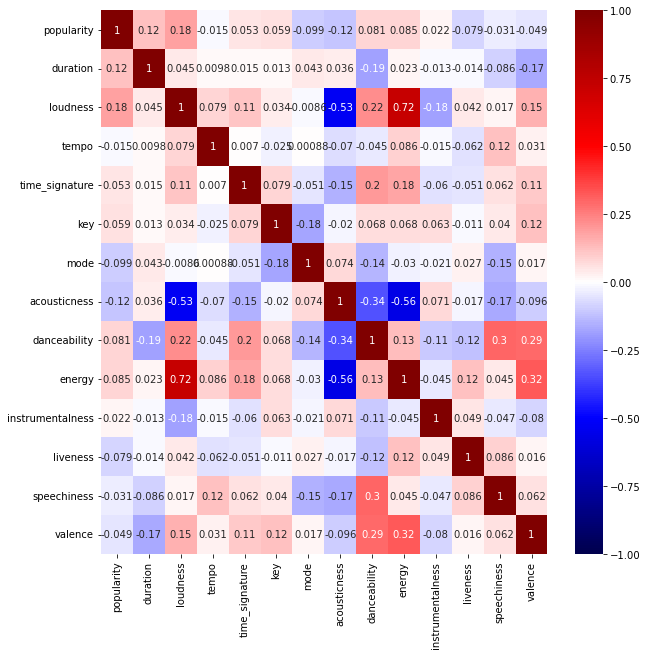

In [20]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(spotify_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [21]:
spotify_df.corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.183157
duration            0.118371
energy              0.085161
danceability        0.081155
key                 0.059334
time_signature      0.052758
instrumentalness    0.021501
tempo              -0.014511
speechiness        -0.031458
valence            -0.048735
liveness           -0.078753
mode               -0.099300
acousticness       -0.115256
Name: popularity, dtype: float64

Simply based on the correlations plot, it looks as if the correlations for our target `popularity` are weak, with the highest correlation being `loudness` with -0.18 correlation. Let's use Seaborn to pairplot the variables with the highest correlation scores.

In [51]:
sns.pairplot(spotify_df[['popularity', 'loudness', 'duration', 'liveness', 'mode', 'acousticness']])

In [53]:
x_df = spotify_df[['loudness', 'duration', 'energy', 'danceability', 'mode', 'valence', 'liveness', 'acousticness']]
y_df = spotify_df['popularity']
lm = LinearRegression()
sk_fit = lm.fit(x_df, y_df)
sk_fit.score(x_df, y_df)

0.07103668077359482